In [59]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


In [60]:
# Load the dataset
G = nx.read_edgelist('email-Eu-core.txt', create_using=nx.DiGraph())

In [61]:
# Parameters for the SIR model
beta = 0.3  # infection rate
gamma = 0.1  # recovery rate
initial_infected = 10  # initial number of infected nodes

In [62]:
# Initialize the state of each node
state = {node: 'S' for node in G.nodes()}
for node in np.random.choice(G.nodes(), initial_infected, replace=False):
    state[node] = 'I'

def step(state, G):
    new_state = state.copy()
    for node in G.nodes():
        if state[node] == 'I':
            for neighbor in G.neighbors(node):
                if state[neighbor] == 'S' and np.random.rand() < beta:
                    new_state[neighbor] = 'I'
            if np.random.rand() < gamma:
                new_state[node] = 'R'
    return new_state

In [63]:
# Run the simulation
timesteps = 50
results = [state.copy()]
for _ in range(timesteps):
    state = step(state, G)
    results.append(state.copy())


In [64]:
# Analyze the results
S, I, R = [], [], []
for t in range(timesteps):
    S.append(sum(1 for node in G.nodes() if results[t][node] == 'S'))
    I.append(sum(1 for node in G.nodes() if results[t][node] == 'I'))
    R.append(sum(1 for node in G.nodes() if results[t][node] == 'R'))

In [65]:
# Visualization function
def visualize_network(state, title):
    color_map = {'S': 'blue', 'I': 'red', 'R': 'green'}
    node_colors = [color_map[state[node]] for node in G.nodes()]
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color=node_colors)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.title(title)
    plt.show()

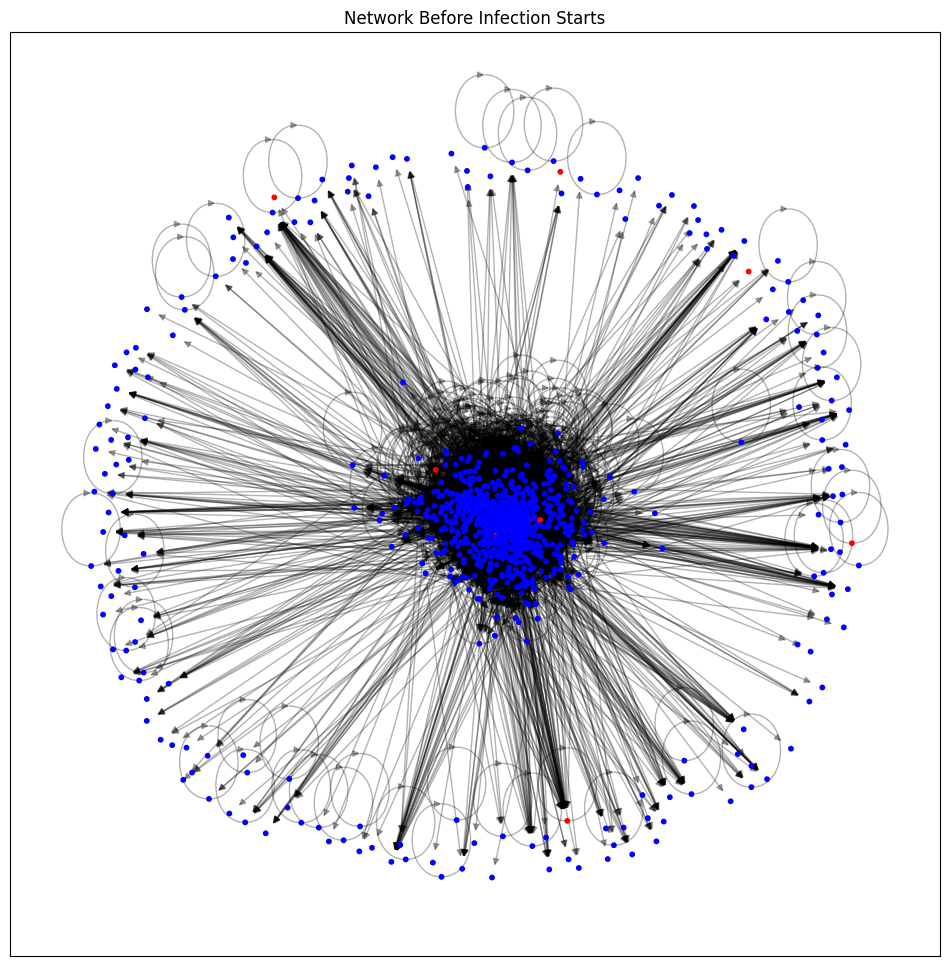

In [66]:
visualize_network(results[0], 'Network Before Infection Starts')

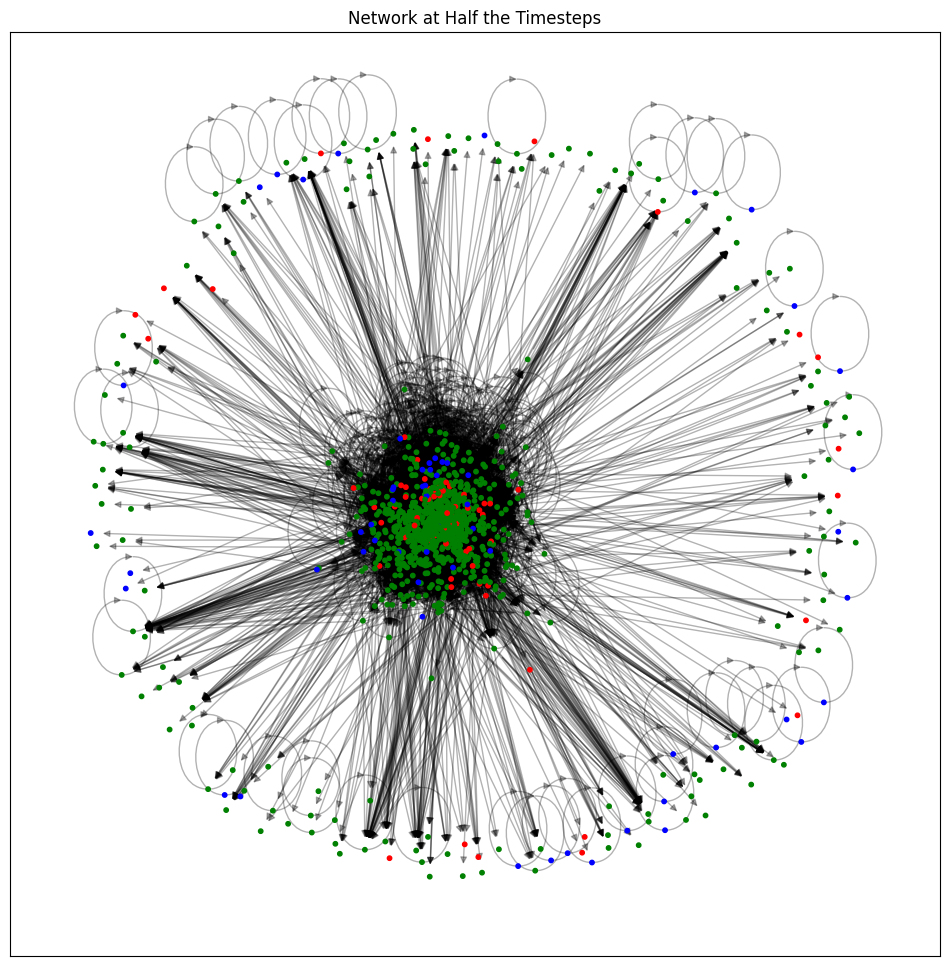

In [67]:
visualize_network(results[timesteps // 2], 'Network at Half the Timesteps')

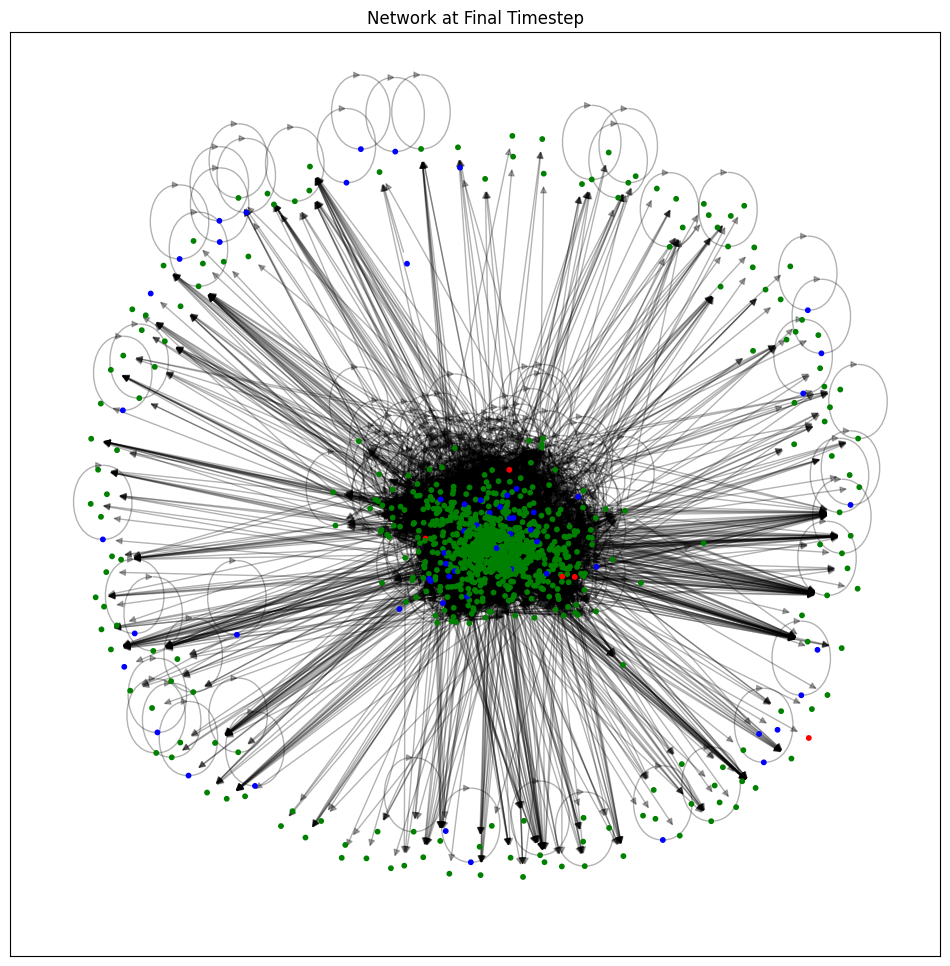

In [68]:
visualize_network(results[-1], 'Network at Final Timestep')

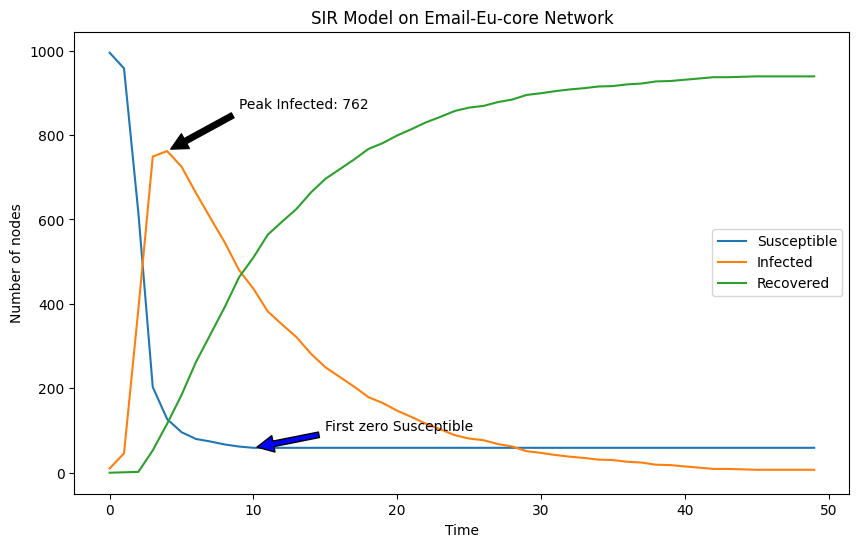

In [70]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(S, label='Susceptible')
plt.plot(I, label='Infected')
plt.plot(R, label='Recovered')

# Annotate the peak of the Infected curve
peak_infected = max(I)
peak_time = I.index(peak_infected)
plt.annotate(f'Peak Infected: {peak_infected}', 
             xy=(peak_time, peak_infected), 
             xytext=(peak_time + 5, peak_infected + 100),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Annotate the time when the number of Susceptible nodes first reaches zero
first_zero_susceptible_time = S.index(min(S))
plt.annotate('First zero Susceptible', 
             xy=(first_zero_susceptible_time, S[first_zero_susceptible_time]), 
             xytext=(first_zero_susceptible_time + 5, 100),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.xlabel('Time')
plt.ylabel('Number of nodes')
plt.legend()
plt.title('SIR Model on Email-Eu-core Network')
plt.show()